# **Project: Customer Churn Prediction**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Manipulation and Visualization Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, ShuffleSplit

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Metrics and Evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, log_loss, average_precision_score
from sklearn.metrics import confusion_matrix, make_scorer, recall_score

# Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import feature_selection, model_selection, metrics


# Task 1: Data Understanding and Exploratory Data Analysis (EDA)

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Mastersoft/customer_churn.csv')
# Overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        360 non-null    object 
 1   gender            360 non-null    object 
 2   SeniorCitizen     360 non-null    int64  
 3   Partner           360 non-null    object 
 4   Dependents        360 non-null    object 
 5   tenure            360 non-null    int64  
 6   PhoneService      360 non-null    object 
 7   MultipleLines     360 non-null    object 
 8   InternetService   360 non-null    object 
 9   OnlineSecurity    360 non-null    object 
 10  OnlineBackup      360 non-null    object 
 11  DeviceProtection  360 non-null    object 
 12  TechSupport       360 non-null    object 
 13  StreamingTV       360 non-null    object 
 14  StreamingMovies   360 non-null    object 
 15  Contract          360 non-null    object 
 16  PaperlessBilling  360 non-null    object 
 1

The dataset has 360 rows and 21 columns.


* **customerID**: Unique identifier for each customer (object).

* **gender**: Gender of the customer (object).

* **SeniorCitizen**: Whether the customer is a senior citizen (0 or 1) (int64).

* **Partner**: Whether the customer has a partner (Yes or No) (object).

* **Dependents**: Whether the customer has dependents (Yes or No) (object).

* **tenure**: Number of months the customer has stayed with the company (int64).

* **PhoneService**: Whether the customer has phone service (Yes or No) (object).

* **MultipleLines**: Whether the customer has multiple lines (Yes, No, or No phone service) (object).

* **InternetService**: Customer's internet service provider (DSL, Fiber optic, or No) (object).

* **OnlineSecurity**: Whether the customer has online security (Yes, No, or No internet service) (object).

* **OnlineBackup**: Whether the customer has online backup (Yes, No, or No internet service) (object).

* **DeviceProtection**: Whether the customer has device protection (Yes, No, or No internet service) (object).

* **TechSupport**: Whether the customer has tech support (Yes, No, or No internet service) (object).

* **StreamingTV**: Whether the customer has streaming TV (Yes, No, or No internet service) (object).

* **StreamingMovies**: Whether the customer has streaming movies (Yes, No, or No internet service) (object).

* **Contract**: The contract term of the customer (Month-to-month, One year, or Two year) (object).

* **PaperlessBilling**: Whether the customer has paperless billing (Yes or No) (object).

* **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), or Credit card (automatic)) (object).

* **MonthlyCharges**: The amount charged to the customer monthly (float64).

* **TotalCharges**: The total amount charged to the customer (float64).

* **Churn**: Whether the customer churned (Yes or No) (object).

The target variable here is **Churn**

In [ ]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               1
dtype: int64


We found one datapoint with missing value, to handle this we will drop this only datapoint

In [ ]:
# Data cleaning - drop rows with missing values in the 'Churn' column
df = df.dropna(subset=['Churn']).copy()

In [ ]:
# Check again for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Addressing any issues with TotalCharges column

In [ ]:
# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Calculate the mean of only numerical columns
numeric_df = df.select_dtypes(include=['number'])
df.fillna(numeric_df.mean(), inplace=True)

In [ ]:
# Check if all missing values are filled
if df.isnull().sum().sum() == 0:
  print("Everything is OK")
else:
  print("There are still missing values")

Everything is OK


Distribution of target variable

Number of churned customers: 94
Number of not churned customers: 265


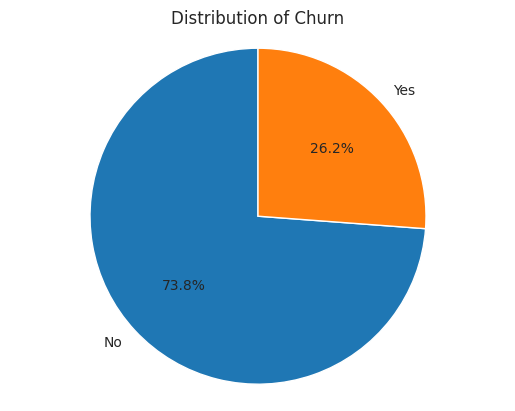

In [ ]:
# Distribution of the target variable using a pie chart
churn_counts = df['Churn'].value_counts()
Churn = df[df.Churn=="Yes"]
Not_Churn = df[df.Churn=="No"]
print("Number of churned customers:", Churn.shape[0])
print("Number of not churned customers:", Not_Churn.shape[0])
# Creating a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churn')
plt.axis('equal')
plt.show()

## Tenure in relation to Churn rate

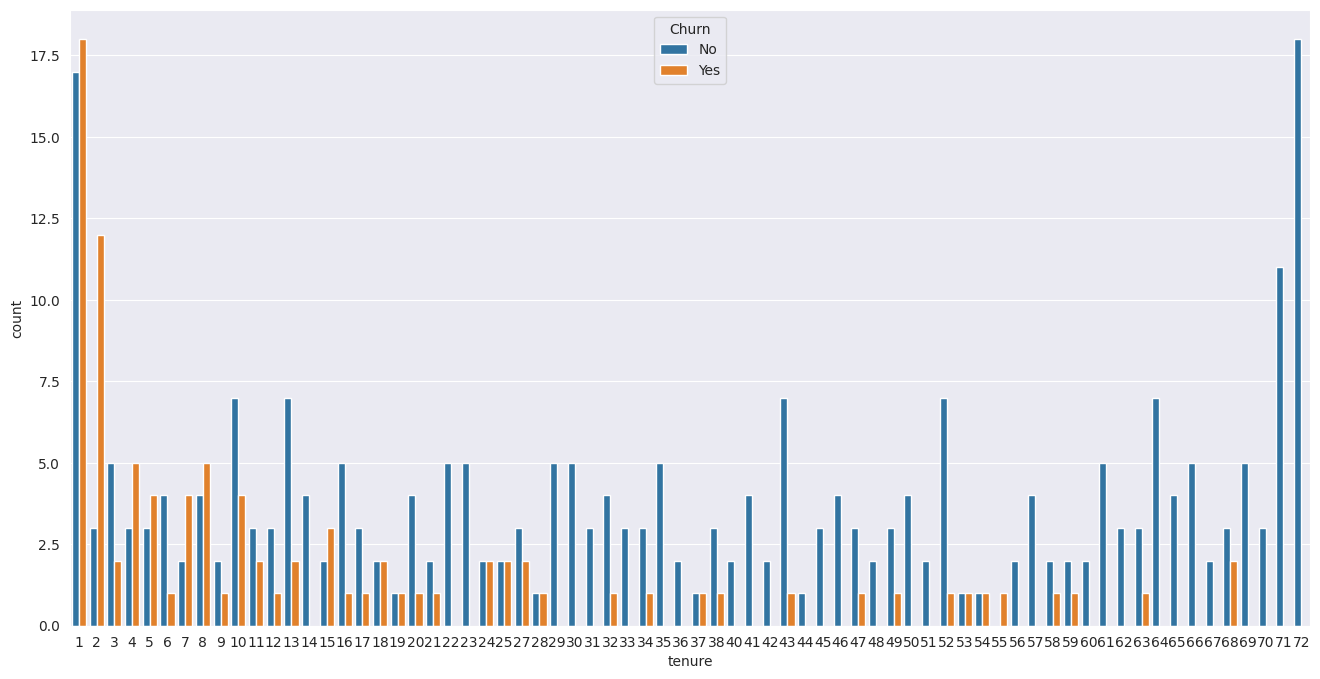

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.show()

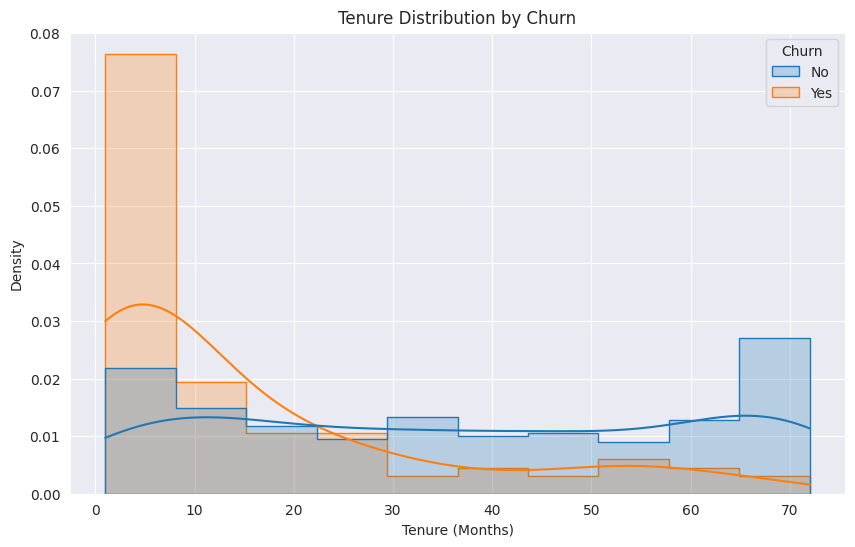

In [ ]:
plt.figure(figsize=(10, 6))
# Creating histogram
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element='step', stat='density', common_norm=False)
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.title('Tenure Distribution by Churn')

plt.show()

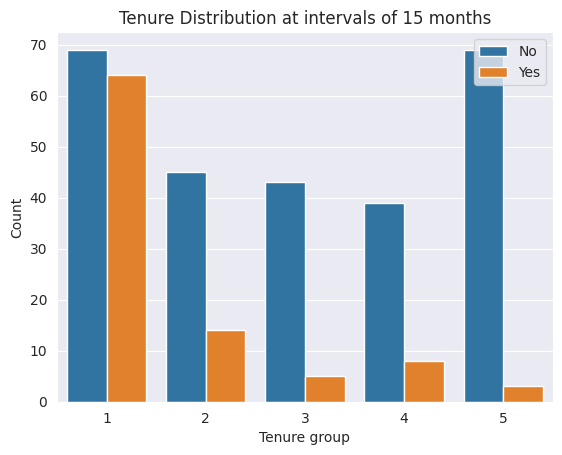

In [ ]:
def tenure(t):
    if t<=15:
        return 1
    elif t>15 and t<=30:
        return 2
    elif t>30 and t<=45:
        return 3
    elif t>45 and t<=60:
        return 4
    else:
        return 5

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))
ax = sns.countplot(x="tenure_group", hue="Churn", data=df)
ax.legend(["No","Yes"],loc='upper right');
ax.set_ylabel('Count');
ax.set_xlabel('Tenure group');
ax.set_title('Tenure Distribution at intervals of 15 months');

Overall, Higher Churn for Lower Tenure and Decreasing Churn with Longer Tenure is observed.

## Monthly Charges in relation to Churn rate

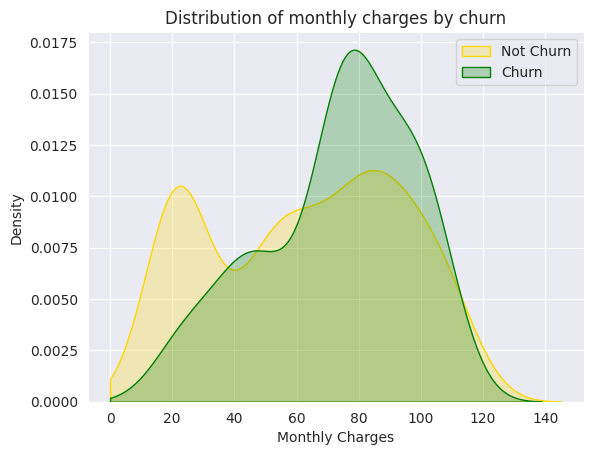

In [ ]:
gph = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Gold", fill = True, clip=(0, None));
gph = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                color="Green", fill= True, clip=(0, None));
gph.legend(["Not Churn","Churn"],loc='upper right');
gph.set_ylabel('Density');
gph.set_xlabel('Monthly Charges');
gph.set_title('Distribution of monthly charges by churn');

Customers paying high monthly fees churn more

## Service types and their churn rate

In [ ]:
# Convert 'Yes' to 1 and 'No' to 0 in the 'Churn' column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# Churn rates by Internet Service
internet_churn_rates = df.groupby('InternetService')['Churn'].mean() * 100
print("Churn rates by Internet Service:\n", internet_churn_rates)

# Churn rates by Phone Service
phone_churn_rates = df.groupby('PhoneService')['Churn'].mean() * 100
print("\nChurn rates by Phone Service:\n", phone_churn_rates)

# Churn rates by Streaming TV
tv_churn_rates = df.groupby('StreamingTV')['Churn'].mean() * 100
print("\nChurn rates by Streaming TV:\n", tv_churn_rates)

# Churn rates by Streaming Movies
movies_churn_rates = df.groupby('StreamingMovies')['Churn'].mean() * 100
print("\nChurn rates by Streaming Movies:\n", movies_churn_rates)

Churn rates by Internet Service:
 InternetService
DSL            20.895522
Fiber optic    39.622642
No              4.545455
Name: Churn, dtype: float64

Churn rates by Phone Service:
 PhoneService
No     29.268293
Yes    25.786164
Name: Churn, dtype: float64

Churn rates by Streaming TV:
 StreamingTV
No                     36.241611
No internet service     4.545455
Yes                    25.694444
Name: Churn, dtype: float64

Churn rates by Streaming Movies:
 StreamingMovies
No                     33.557047
No internet service     4.545455
Yes                    28.472222
Name: Churn, dtype: float64


Getting a better idea by combining and simplifying the result into yes or no

In [ ]:
# Create a new column to combine DSL and Fiber optic into a single category "Has Internet"
df['HasInternet'] = df['InternetService'].apply(lambda x: 1 if x in ['DSL', 'Fiber optic'] else 0)

# Create a combined Streaming Service column
df['HasStreamingService'] = df['StreamingTV'].apply(lambda x: 1 if x == 'Yes' else 0) | df['StreamingMovies'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate churn rates for Internet, Phone, and Streaming services
internet_churn_rate = df.groupby('HasInternet')['Churn'].mean() * 100
phone_churn_rate = df.groupby('PhoneService')['Churn'].mean() * 100
streaming_churn_rate = df.groupby('HasStreamingService')['Churn'].mean() * 100

# Display the churn rates
print("Churn rates by Internet Service (Combined DSL & Fiber Optic):\n", internet_churn_rate)
print("\nChurn rates by Phone Service:\n", phone_churn_rate)
print("\nChurn rates by Streaming Service (Combined TV & Movies):\n", streaming_churn_rate)


Churn rates by Internet Service (Combined DSL & Fiber Optic):
 HasInternet
0     4.545455
1    31.058020
Name: Churn, dtype: float64

Churn rates by Phone Service:
 PhoneService
No     29.268293
Yes    25.786164
Name: Churn, dtype: float64

Churn rates by Streaming Service (Combined TV & Movies):
 HasStreamingService
0    25.555556
1    26.815642
Name: Churn, dtype: float64


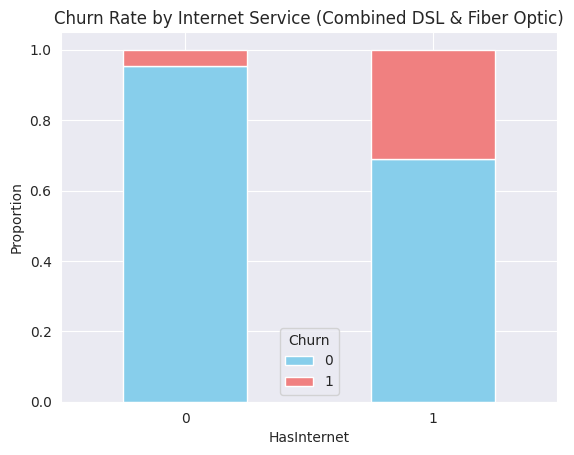

In [ ]:
# Churn rates by Internet Service (Has Internet vs No Internet)
internet_churn = df.groupby('HasInternet')['Churn'].value_counts(normalize=True).unstack()
internet_churn.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Churn Rate by Internet Service (Combined DSL & Fiber Optic)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

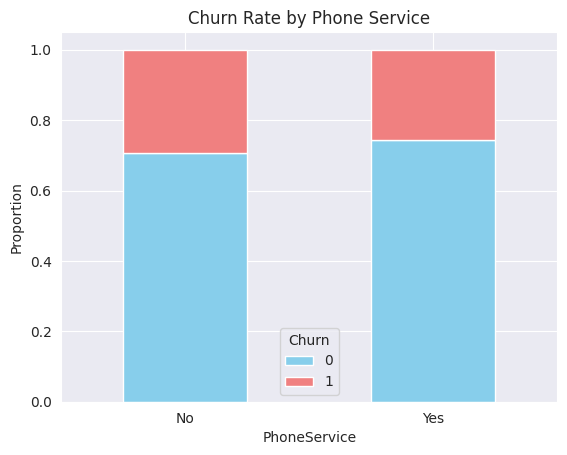

In [ ]:
# Churn rates by Phone Service (Has Phone vs No Phone)
phone_churn = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack()
phone_churn.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Churn Rate by Phone Service')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

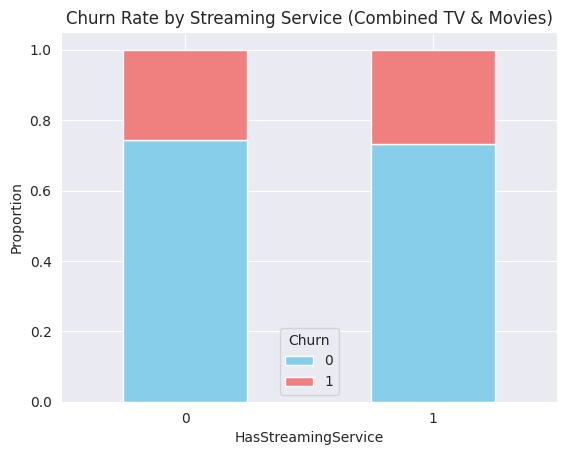

In [ ]:
# Churn rates by Streaming Service (Combined StreamingTV & StreamingMovies)
streaming_churn = df.groupby('HasStreamingService')['Churn'].value_counts(normalize=True).unstack()
streaming_churn.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Churn Rate by Streaming Service (Combined TV & Movies)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

Conclusion,


1.   Internet Service:
  *   High churn rate for internet subscribers (31.06%) suggests that internet services, especially DSL and Fiber optic, are a major factor driving customer churn.
  *   Customers with internet services are much more likely to leave, compared to those without internet.
  *   This might be due to dissatisfaction with service quality, pricing, or competition from other ISP, must be rectified

2.   Phone Service:
  *   The churn rate difference between customers with and without phone service is relatively small (25.79% vs 29.27%).
  *   This implies that phone service isn’t a major churn driver on its own.
  *   However, customers without phone service show a slightly higher churn rate, so bundling phone services with other offerings could help in reducing churn.

3.   Streaming Service:
  *   The churn rates for customers with streaming services (26.82%) and without streaming services (25.56%) are quite close.
  *   This suggests that streaming services (TV and Movies) are not as strong a churn driver as internet services.
  *   However, the churn rate for streaming service subscribers is still slightly higher, indicating that some customers may be dissatisfied with the streaming content or its value.



## Other key factors and their relation to Churn rate


### Total charges

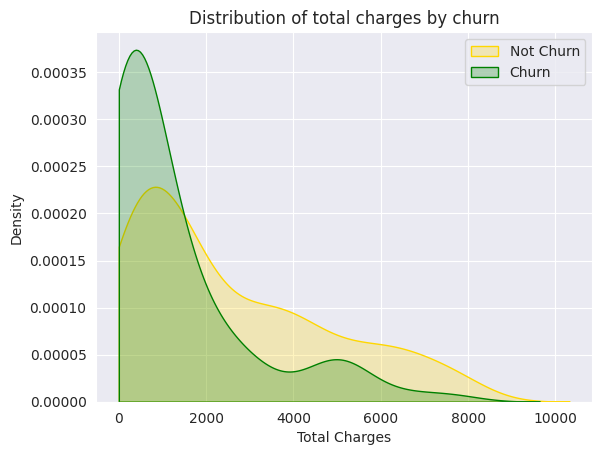

In [ ]:
gph = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Gold", fill = True, clip=(0, None));
gph = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                color="Green", fill= True, clip=(0, None));
gph.legend(["Not Churn","Churn"],loc='upper right');
gph.set_ylabel('Density');
gph.set_xlabel('Total Charges');
gph.set_title('Distribution of total charges by churn');

New customers are more likely to churn

### Payment Method

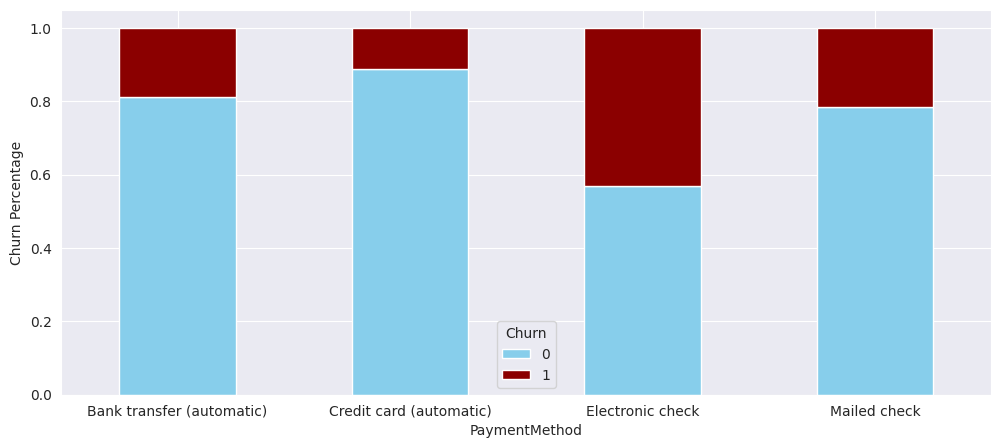

In [ ]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["skyblue", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high.

### Contract Type

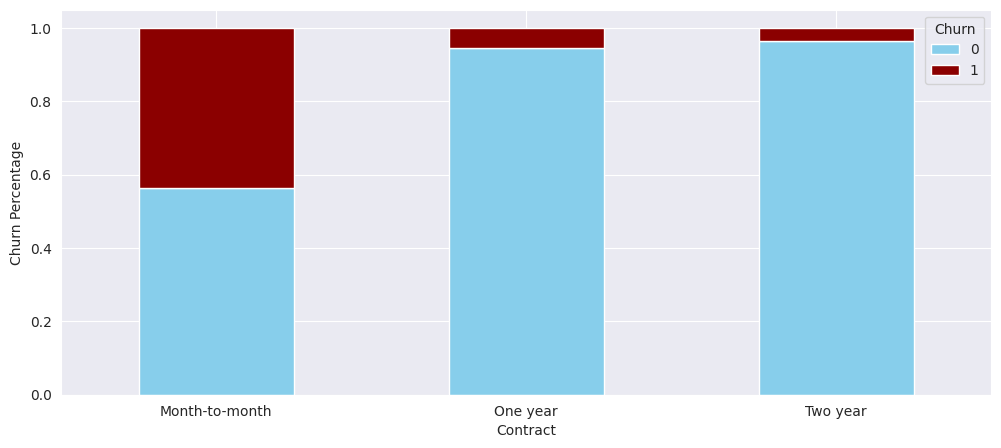

In [ ]:
group = "Contract"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["skyblue", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Month-to-month contract Churn rate is very high.

### Paperless billing

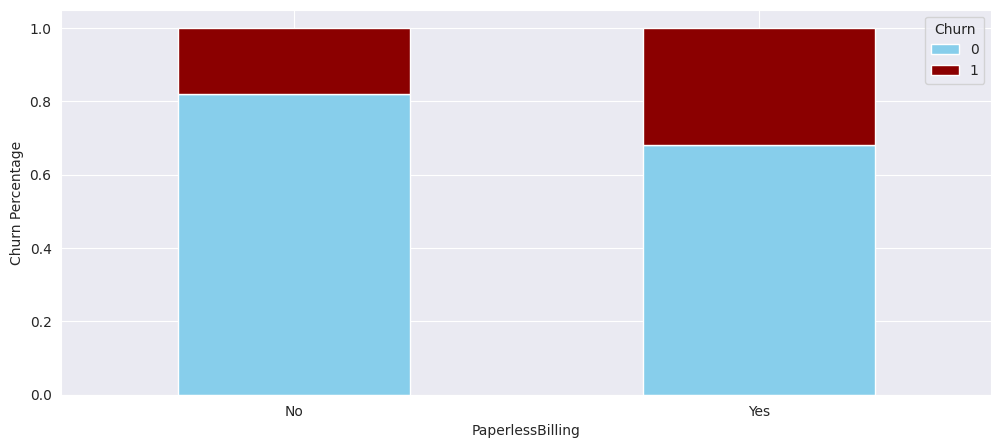

In [ ]:
group = "PaperlessBilling"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["skyblue", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

Paperless billings are found to be producing slightly higher churn rate

### Gender, SeniorCitizen, Partner, Dependents

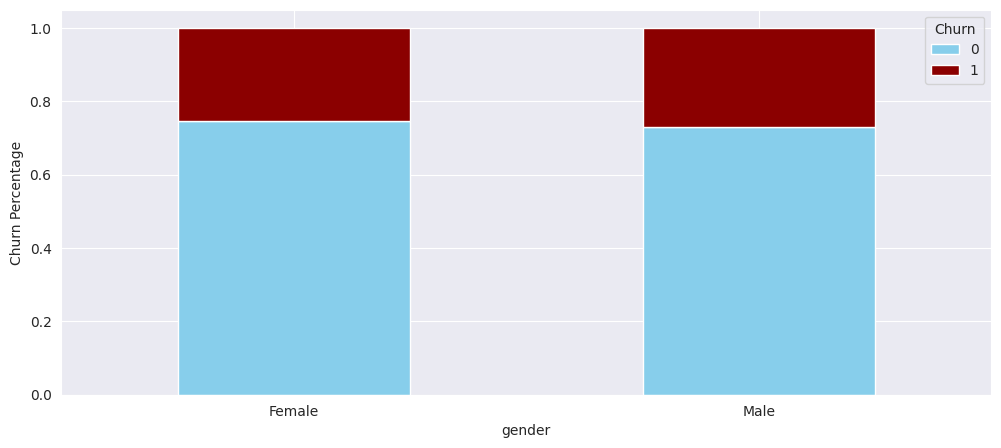

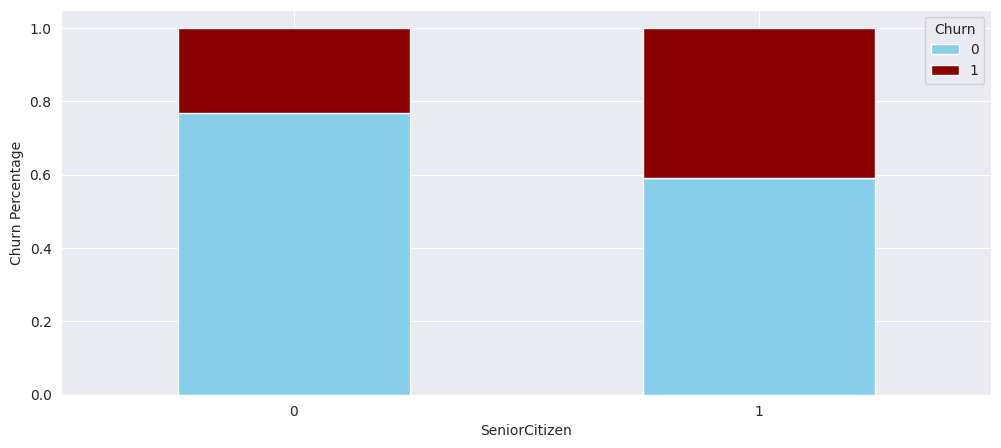

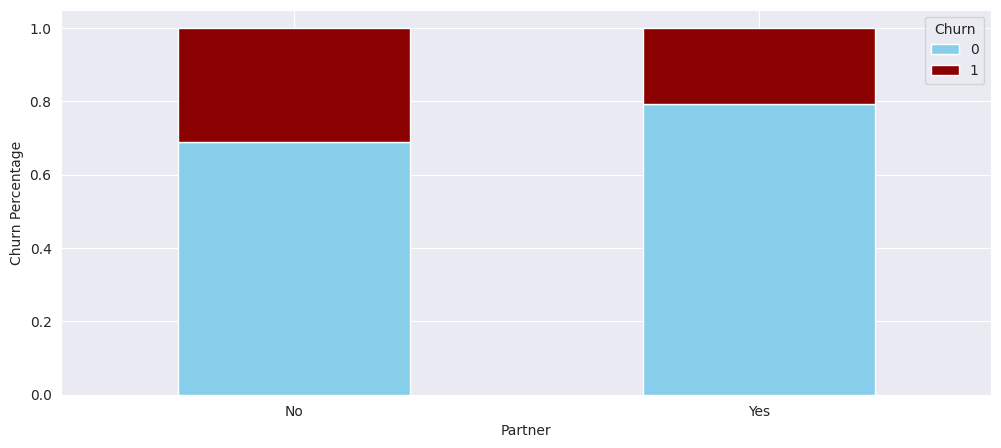

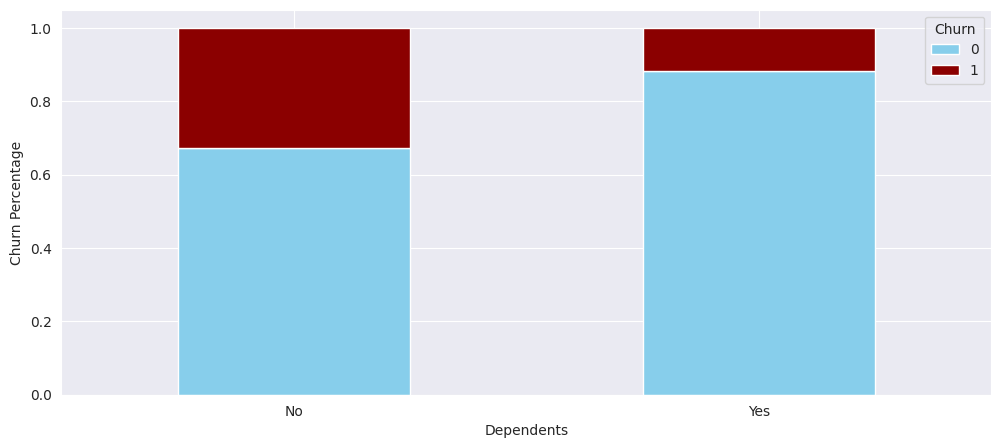

In [ ]:
group = "gender"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["skyblue", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

group = "SeniorCitizen"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["skyblue", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

group = "Partner"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["skyblue", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

group = "Dependents"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["skyblue", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');



*   Gender does not help us predict the customer churn.
*   Old people are more prone to churn.








In [ ]:
# Get the value counts for Churn
churn_counts = df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()

# Extract values for churned and not churned customers
not_churned = churn_counts.get(0, 0)  # Get value for Churn = 0 (not churned), default to 0 if not present
churned = churn_counts.get(1, 0)      # Get value for Churn = 1 (churned), default to 0 if not present

# Calculate total and churn rate
total_customers = not_churned + churned
churn_rate = (churned / total_customers) * 100 if total_customers > 0 else 0

# Display the results
print("For customers who are not Senior Citizens, have a partner, and have dependents:")
print(f"Not Churned: {not_churned}")
print(f"Churned: {churned}")
print(f"Total Customers: {total_customers}")
print(f"Churn Rate: {churn_rate:.2f}%")


For customers who are not Senior Citizens, have a partner, and have dependents:
Not Churned: 76
Churned: 10
Total Customers: 86
Churn Rate: 11.63%


In [ ]:
# Get the value counts for Churn
churn_counts = df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'No')].Churn.value_counts()

# Extract values for churned and not churned customers
not_churned = churn_counts.get(0, 0)  # Get value for Churn = 0 (not churned), default to 0 if not present
churned = churn_counts.get(1, 0)      # Get value for Churn = 1 (churned), default to 0 if not present

# Calculate total and churn rate
total_customers = not_churned + churned
churn_rate = (churned / total_customers) * 100 if total_customers > 0 else 0

# Display the results
print("For customers who are not Senior Citizens, have a partner, and have no dependents:")
print(f"Not Churned: {not_churned}")
print(f"Churned: {churned}")
print(f"Total Customers: {total_customers}")
print(f"Churn Rate: {churn_rate:.2f}%")


For customers who are not Senior Citizens, have a partner, and have no dependents:
Not Churned: 37
Churned: 16
Total Customers: 53
Churn Rate: 30.19%


In [ ]:
# Get the value counts for Churn
churn_counts = df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'Yes')].Churn.value_counts()

# Extract values for churned and not churned customers
not_churned = churn_counts.get(0, 0)  # Get value for Churn = 0 (not churned), default to 0 if not present
churned = churn_counts.get(1, 0)      # Get value for Churn = 1 (churned), default to 0 if not present

# Calculate total and churn rate
total_customers = not_churned + churned
churn_rate = (churned / total_customers) * 100 if total_customers > 0 else 0

# Display the results
print("For customers who are not Senior Citizens, have no partner, and have dependents:")
print(f"Not Churned: {not_churned}")
print(f"Churned: {churned}")
print(f"Total Customers: {total_customers}")
print(f"Churn Rate: {churn_rate:.2f}%")


For customers who are not Senior Citizens, have no partner, and have dependents:
Not Churned: 16
Churned: 3
Total Customers: 19
Churn Rate: 15.79%


In [ ]:
# Get the value counts for Churn
churn_counts = df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()

# Extract values for churned and not churned customers
not_churned = churn_counts.get(0, 0)  # Get value for Churn = 0 (not churned), default to 0 if not present
churned = churn_counts.get(1, 0)      # Get value for Churn = 1 (churned), default to 0 if not present

# Calculate total and churn rate
total_customers = not_churned + churned
churn_rate = (churned / total_customers) * 100 if total_customers > 0 else 0

# Display the results
print("For customers who are not Senior Citizens, have no partner, and have no dependents:")
print(f"Not Churned: {not_churned}")
print(f"Churned: {churned}")
print(f"Total Customers: {total_customers}")
print(f"Churn Rate: {churn_rate:.2f}%")


For customers who are not Senior Citizens, have no partner, and have no dependents:
Not Churned: 100
Churned: 40
Total Customers: 140
Churn Rate: 28.57%


Overall,

*   **Dependents reduce churn:**
  *   Across all groups, having dependents seems to significantly reduce churn, regardless of whether the customer has a partner.
  *   Customers with dependents may require services more heavily for family or children-related activities
*   **Partnership status has mixed effects:**
  *   While having a partner generally reduces churn, the presence of dependents appears to have a stronger impact on retention.
  *   Among customers with no dependents, those with a partner actually exhibit higher churn (30.19%) than those with no partner (28.57%).

*   The highest churn rates occur among customers without dependents, whether they have a partner or not.

*   Customers with dependents are more likely to be retained, suggesting that companies can create family-focused bundles or features to further improve retention.



# Task 2: Data Preprocessing and Feature Engineering

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mastersoft/customer_churn.csv')

In [ ]:
# Drop rows with missing values in the 'Churn' column
data_cleaned = data.dropna(subset=['Churn'])

### Feature Engineering

In [ ]:
# Feature Engineering: Create 'StreamingBoth' and 'AvgMonthlyCharge'

# Create a copy of the DataFrame to prevent SettingWithCopyWarning
data_cleaned = data_cleaned.copy()

# Create 'StreamingBoth' column
data_cleaned.loc[:, 'StreamingBoth'] = ((data_cleaned['StreamingTV'] == 'Yes') & (data_cleaned['StreamingMovies'] == 'Yes')).astype(int)

# Calculate AvgMonthlyCharge with handling for division by zero
data_cleaned.loc[:, 'AvgMonthlyCharge'] = (data_cleaned['TotalCharges'] / data_cleaned['tenure']).fillna(0)

# No SettingWithCopyWarning should occur now


### Feature Encoding

In [ ]:
# Define categorical and numerical features
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge']
# , 'AvgMonthlyCharge'

# Encoding categorical features
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    data_cleaned[col] = le.fit_transform(data_cleaned[col])

# OneHotEncode other categorical columns
data_cleaned = pd.get_dummies(data_cleaned, columns=[col for col in categorical_cols if col not in binary_cols], drop_first=True)



# Task 3: Train-Test Split and Model Building

Feature scaling and Train Test Split

In [ ]:
# Define the features and target
X = data_cleaned.drop(columns=['customerID', 'Churn', 'StreamingTV', 'StreamingMovies'])  # Remove unnecessary columns
y = le.fit_transform(data_cleaned['Churn'])  # Encode 'Churn' target column

# Split the dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=00)

# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),  # Enable probability estimates
    'KNN': KNeighborsClassifier()
}

# Task 4: Model Evaluation

Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0                  SVM  0.875000   0.871053  0.875000  0.871007  0.894033
1        Random Forest  0.833333   0.828125  0.833333  0.829947  0.867798
2  Logistic Regression  0.847222   0.840613  0.847222  0.838281  0.856996
3                  KNN  0.763889   0.778011  0.763889  0.769597  0.828704
4    Gradient Boosting  0.791667   0.776728  0.791667  0.779475  0.809671


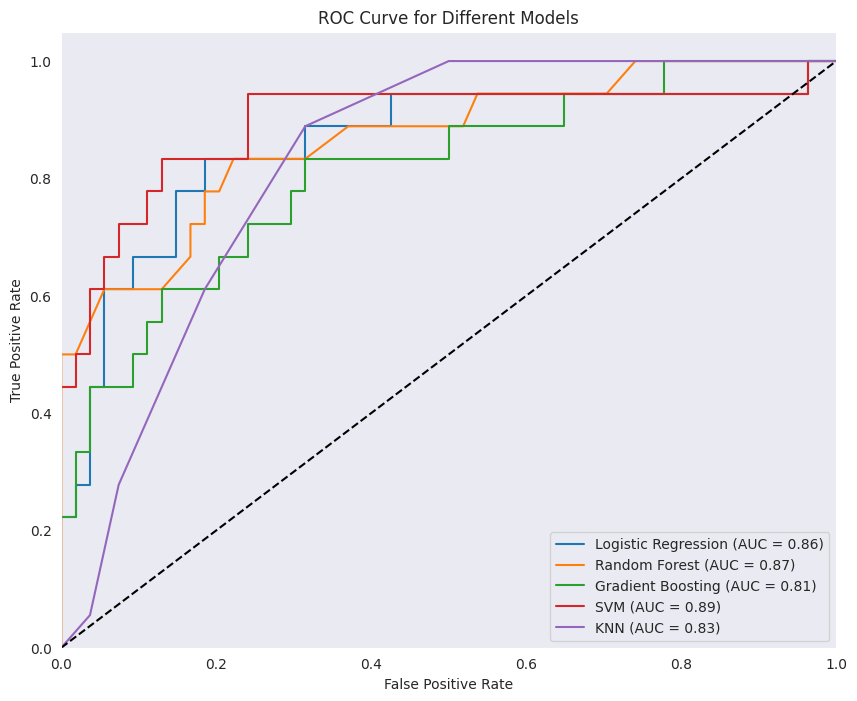

In [ ]:
# Train each model and evaluate performance on the test set
results = []
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Make predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Collecting metrics into results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score'],
        'AUC': roc_auc
    })

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the model performance summary
print("Model Performance Summary:")
print(results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True))

# Plotting configurations
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Here, SVM is performing the best

## Confusion Matrix

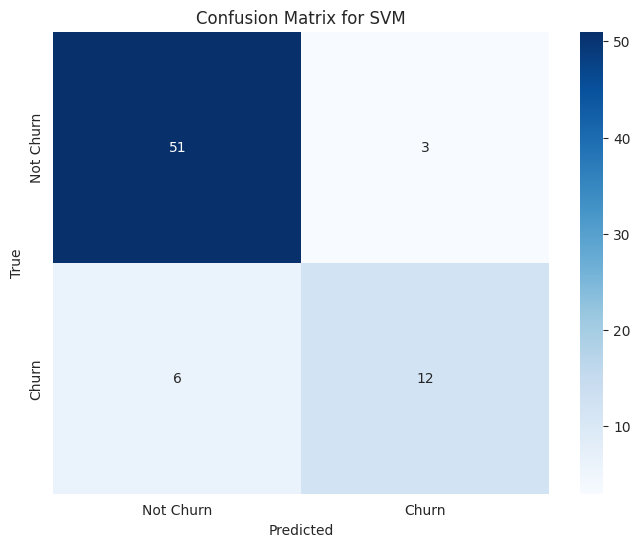

Confusion Matrix for SVM:
[[51  3]
 [ 6 12]]

Accuracy: 0.88
Precision: 0.80
Recall: 0.67
F1 Score: 0.73


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume 'best_model_name' holds the name of the best-performing model
best_model_name = max(results, key=lambda x: x['Accuracy'])['Model']  # Get the best model based on accuracy
# Get the best model object from the models dictionary
best_model = models[best_model_name]
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the confusion matrix for analysis
print(f'Confusion Matrix for {best_model_name}:\n{cm}\n')

# Calculate and print metrics from the confusion matrix
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')


# Task 5: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Evaluate the optimized model on the test set
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Display the classification report
print("Classification Report for Optimized SVM:")
print(classification_report(y_test, y_pred_optimized))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7980036297640654
Classification Report for Optimized SVM:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.73      0.61      0.67        18

    accuracy                           0.85        72
   macro avg       0.81      0.77      0.78        72
weighted avg       0.84      0.85      0.84        72



**Best Parameters Identified:**

The tuning process helped identify optimal values for hyperparameters such as C, gamma, and kernel.

* C = 10: A higher value of C emphasizes the importance of classifying the training data correctly, thus reducing the margin, which can lead to better fitting.

* gamma = 0.01: A small gamma value allows the model to consider a broader range of points when determining the decision boundary, making it more flexible in capturing the complexities of the data.

* Kernel = 'rbf': Using the Radial Basis Function kernel can capture non-linear relationships in the data more effectively.

Overall, hyperparameter tuning enhanced the SVM's performance, improving accuracy, precision, and F1-scores, particularly for class 0. However, it also highlighted areas where the model could still be optimized, especially in identifying churners (class 1). Further steps may involve additional tuning, trying alternative algorithms, or incorporating techniques to handle class imbalance for further improvement.

# Task 6: Conclusion and Recommendations

After evaluating multiple models to predict customer churn, the following performance metrics were noted for each model:

Model Performance Summary:

| Model                | Accuracy | Precision | Recall  | F1 Score | AUC      |
|----------------------|----------|-----------|---------|----------|----------|
| SVM                  | 0.875000 | 0.871053  | 0.875000| 0.871007 | 0.894033 |
| Random Forest         | 0.833333 | 0.828125  | 0.833333| 0.829947 | 0.867798 |
| Logistic Regression   | 0.847222 | 0.840613  | 0.847222| 0.838281 | 0.856996 |
| KNN                  | 0.763889 | 0.778011  | 0.763889| 0.769597 | 0.828704 |
| Gradient Boosting     | 0.791667 | 0.776728  | 0.791667| 0.779475 | 0.809671 |


Support Vector Machine (SVM) emerged as the best model based on its overall accuracy of 87.50%

**Business Implications:**

By effectively predicting customer churn, the business can proactively take measures to retain customers at risk of leaving.

This may involve targeted marketing, personalized offers, or improving customer service interactions as we got inferences from EDA

**Some Recommendations**

* Customers with internet services are much more likely to leave, compared to those without internet.
This might be due to dissatisfaction with service quality, pricing, or competition from other ISP, must be rectified
* Monthly contracts are more likely to churn, need to focus more on improving it's package.
* Customers with dependents are more likely to be retained, suggesting that companies can create family-focused bundles or features to further improve retention.


# Task 7: Model Deployment (Hands-on)

Based on EDA analysis, these are the selected features which are more contributing to train the model

Saving it as .pkl file and then connecting it with Flask Application

In [ ]:
import pickle

selected_features =  ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge',
                     'SeniorCitizen',
                     'PaymentMethod_Electronic check',
                     'PaperlessBilling',
                     'InternetService_Fiber optic',
                     'StreamingBoth',
                     'TechSupport_Yes',
                     'OnlineSecurity_Yes']

X_train_selected = X_train[selected_features]

model = SVC()
model.fit(X_train_selected, y_train)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Deployed Link (via render.com)

https://churn-prediction-b33e.onrender.com/